In [1]:
#import required libraries
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [2]:
#load the dataset
(X_train,y_train), (X_test,y_test)=datasets.mnist.load_data()

In [3]:
print('X Training shape: ',X_train.shape)
print('Y Training shape: ',y_train.shape)
print('X Testing shape: ',X_test.shape)
print('Y Testing shape: ',y_test.shape)

X Training shape:  (60000, 28, 28)
Y Training shape:  (60000,)
X Testing shape:  (10000, 28, 28)
Y Testing shape:  (10000,)


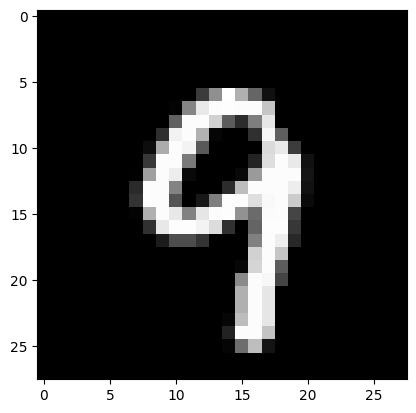

9


In [5]:
plt.imshow(X_train[550], cmap='gray')
plt.show()
print(y_train[550])

In [6]:
input_shape = (28,28,1)
epochs = 5

In [8]:
#Normalize Images
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [10]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [11]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [13]:
#One hot encoding for 10 labels of ytrain and ytest
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28,1)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
r = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),batch_size=128)

Epoch 1/5


2023-07-25 09:59:15.284192: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


469/469 [==============================] - 5s 10ms/step - loss: 0.3616 - accuracy: 0.9015 - val_loss: 0.2036 - val_accuracy: 0.9400
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1709 - accuracy: 0.9509 - val_loss: 0.1418 - val_accuracy: 0.9571
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1237 - accuracy: 0.9645 - val_loss: 0.1181 - val_accuracy: 0.9657
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0958 - accuracy: 0.9727 - val_loss: 0.1059 - val_accuracy: 0.9681
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0776 - accuracy: 0.9776 - val_loss: 0.0918 - val_accuracy: 0.9725


In [20]:
model.save('/Users/nageshjadhav/Desktop/minist_ver_1.h5')

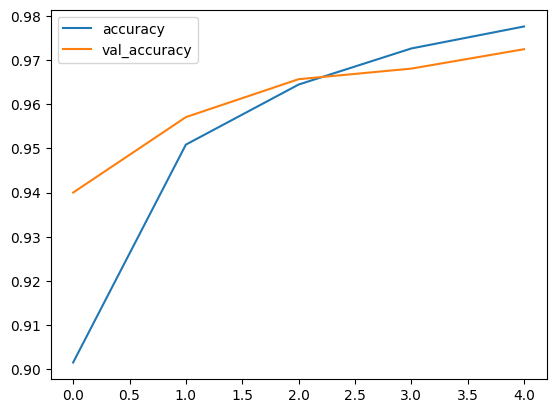

In [21]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

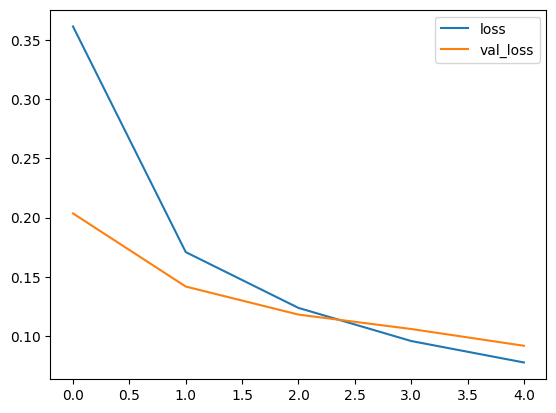

In [22]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [26]:
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

313/313 [==============================] - 1s 2ms/step


<Axes: >

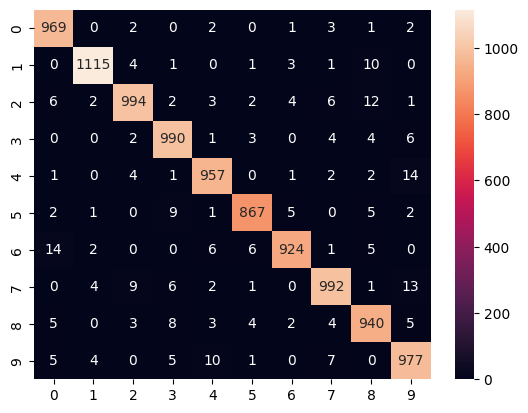

In [31]:
sns.heatmap(confusion_mtx, annot=True, fmt='g')

In [32]:
import cv2 as cv

In [34]:
img = cv.imread('/Users/nageshjadhav/Desktop/four.png')

In [35]:
img.shape

(402, 414, 3)

In [36]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [37]:
gray.shape

(402, 414)

In [38]:
img_rs = cv.resize(gray, (28, 28))

In [39]:
img_rs = np.expand_dims(img_rs,0)

In [40]:
img_rs = np.expand_dims(img_rs,-1)

In [41]:
img_rs.shape

(1, 28, 28, 1)

In [42]:
num = model.predict(img_rs)
print(num)

1/1 [==============================] - 0s 353ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [43]:
from numpy.core.fromnumeric import argmax
print(argmax(num))

3


In [46]:
rs = [0,1,2,3,4,5,6,7,8,9]
result = rs[argmax(num)+1]
print(result)

4
